<span style="font-size:20px;font-weight:bold"> 1.1 Problem 1</span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from io import StringIO
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
import re 
import matplotlib.pyplot as plt  
from sklearn.cluster import FeatureAgglomeration
from sklearn.metrics import pairwise_distances

In [3]:
# 数据集和描述文件 URL
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [4]:
try:

    column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

    response = requests.get(data_url)
    response.raise_for_status()
    data = response.text

    auto_mpg_df = pd.read_csv(StringIO(data), delim_whitespace=True, names=column_names)

    print(auto_mpg_df.info()) 

    print(auto_mpg_df.head()) 

except requests.exceptions.RequestException as e:
    print(f"下载数据时出错: {e}")
    exit()
except Exception as e:
    print(f"读取数据时发生错误: {e}")
    exit()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.

C:\Users\SPEED\AppData\Local\Temp\ipykernel_20840\550183160.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_mpg_df = pd.read_csv(StringIO(data), delim_whitespace=True, names=column_names)


In [5]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# 1. 选择连续特征
continuous_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
selected_data = auto_mpg_df[continuous_features].copy()  

In [7]:
selected_data.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [8]:
selected_data = selected_data.replace('?', np.nan)

In [9]:
#2.用平均值处理缺失值
imputer = SimpleImputer(strategy='mean') 
selected_data.loc[:,:] = imputer.fit_transform(selected_data)  

In [10]:
# 3. 数据标准化
scaler = StandardScaler()
selected_scaled = scaler.fit_transform(selected_data)

In [11]:
# 将 X_scaled 转换为 Pandas DataFrame
selected_scaled = pd.DataFrame(selected_scaled, index=selected_data.index, columns=selected_data.columns) # 将 X_scaled 转换为 Pandas DataFrame，并使用 X 的索引和列名

In [12]:
n_clusters = 3  
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', metric='euclidean') 
selected_scaled['cluster'] = agg_clustering.fit_predict(selected_scaled)  
selected_data['cluster'] = agg_clustering.fit_predict(selected_scaled) 

In [13]:
selected_data.head(50)

,mpg,displacement,horsepower,weight,acceleration,cluster
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1
5,15.0,429.0,198.0,4341.0,10.0,1
6,14.0,454.0,220.0,4354.0,9.0,1
7,14.0,440.0,215.0,4312.0,8.5,1
8,14.0,455.0,225.0,4425.0,10.0,1
9,15.0,390.0,190.0,3850.0,8.5,1


In [14]:
selected_scaled.head(20)

,mpg,displacement,horsepower,weight,acceleration,cluster
0,-0.706439,1.090604,0.669196,0.630870,-1.295498,1
1,-1.090751,1.503514,1.586599,0.854333,-1.477038,1
2,-0.706439,1.196232,1.193426,0.550470,-1.658577,1
3,-0.962647,1.061796,1.193426,0.546923,-1.295498,1
4,-0.834543,1.042591,0.931311,0.565841,-1.840117,1
5,-1.090751,2.262118,2.451579,1.620492,-2.021656,1
6,-1.218855,2.502182,3.028233,1.635863,-2.384735,1
7,-1.218855,2.367746,2.897175,1.586204,-2.566274,1
8,-1.218855,2.511784,3.159290,1.719809,-2.021656,1
9,-1.090751,1.887617,2.241887,1.039961,-2.566274,1


In [15]:
# 7. 确保聚类结果是数值类型
selected_scaled['cluster'] = pd.to_numeric(selected_scaled['cluster'], errors='coerce')
selected_data['cluster'] = pd.to_numeric(selected_data['cluster'], errors='coerce')

In [16]:
# 结果分析
# 1. 计算每个聚类的均值和方差
cluster_means = selected_scaled.groupby('cluster').mean()
cluster_variances = selected_scaled.groupby('cluster').var()

print("The mean of clustering after standardization:\n", cluster_means)
print("\nThe variance of clustering after standardization:\n", cluster_variances)

The mean of clustering after standardization:
               mpg  displacement  horsepower    weight  acceleration
cluster                                                            
0        0.341124     -0.471690   -0.471242 -0.439845      0.311340
1       -1.151105      1.484507    1.502830  1.387534     -1.062679
2        2.585833     -0.976350   -1.453937 -0.989238      2.652985

The variance of clustering after standardization:
               mpg  displacement  horsepower    weight  acceleration
cluster                                                            
0        0.677814      0.323792    0.202864  0.418150      0.642682
1        0.078296      0.192671    0.463119  0.270986      0.420519
2        0.004923      0.001130    0.002748  0.030297      0.304409


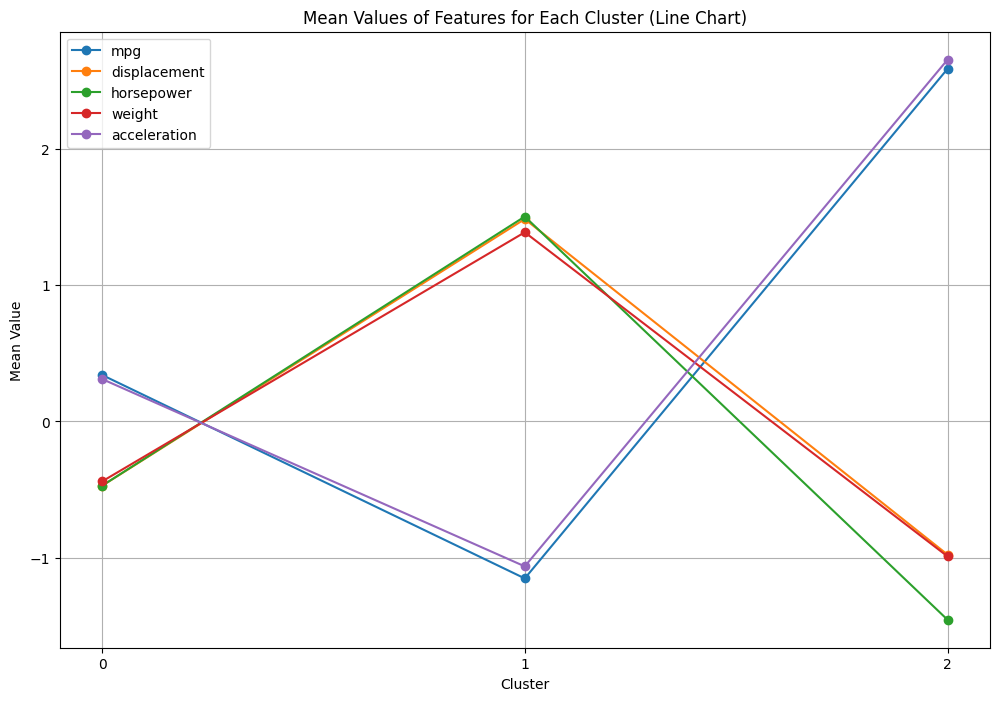

In [17]:
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
plt.figure(figsize=(12, 8))  
for feature in features:
    plt.plot(cluster_means.index, cluster_means[feature], marker='o', label=feature)  

plt.title('Mean Values of Features for Each Cluster (Line Chart)')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(cluster_means.index)  
plt.legend()  
plt.grid(True)  
plt.savefig('figures/cluster_means_line.png')
plt.show()

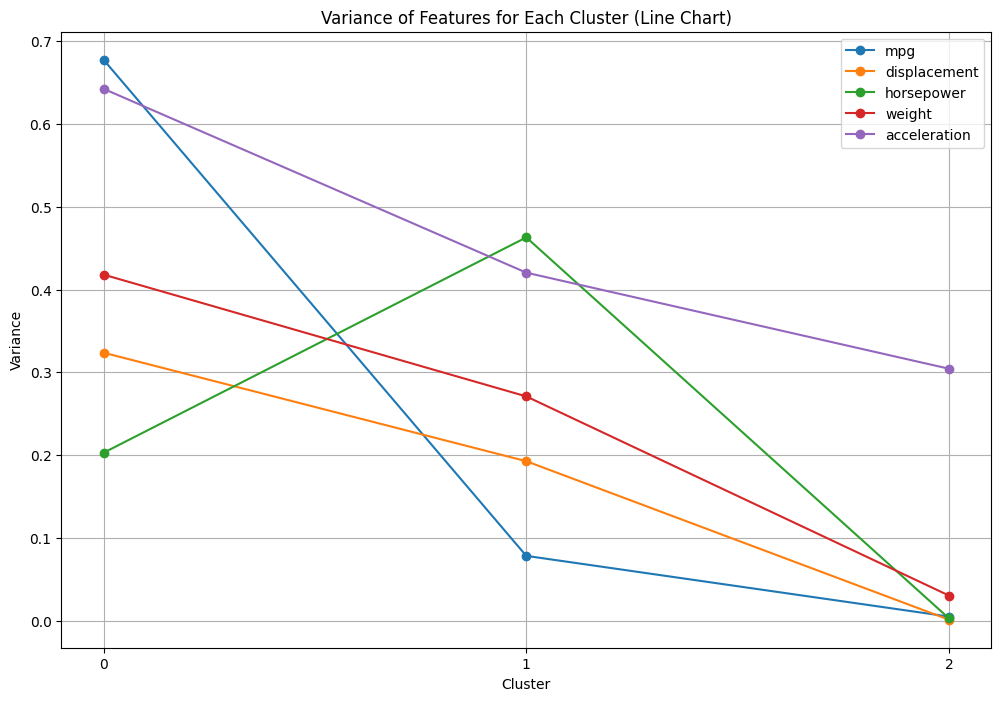

In [18]:
plt.figure(figsize=(12, 8))  
for feature in features:
    plt.plot(cluster_variances.index, cluster_variances[feature], marker='o', label=feature)  # 绘制折线图

plt.title('Variance of Features for Each Cluster (Line Chart)')
plt.xlabel('Cluster')
plt.ylabel('Variance')
plt.xticks(cluster_variances.index)  
plt.legend()  
plt.grid(True)  
plt.savefig('figures/cluster_variance_line.png')
plt.show()

In [19]:
cluster_means_2 = selected_data.groupby('cluster').mean()
cluster_variances_2 = selected_data.groupby('cluster').var()

print("标准化前聚类均值:\n", cluster_means_2)
print("\n标准化前聚类方差:\n", cluster_variances_2)

标准化前聚类均值:
                mpg  displacement  horsepower       weight  acceleration
cluster                                                                
0        26.177441    144.304714   86.490964  2598.414141     16.425589
1        14.528866    348.020619  161.804124  4143.969072     12.641237
2        43.700000     91.750000        49.0  2133.750000     22.875000

标准化前聚类方差:
                mpg  displacement  horsepower         weight  acceleration
cluster                                                                  
0        41.303375   3511.485383  295.270673  299118.709664      4.875221
1         4.771033   2089.499570  674.075816  193847.051117      3.189948
2         0.300000     12.250000         4.0   21672.916667      2.309167


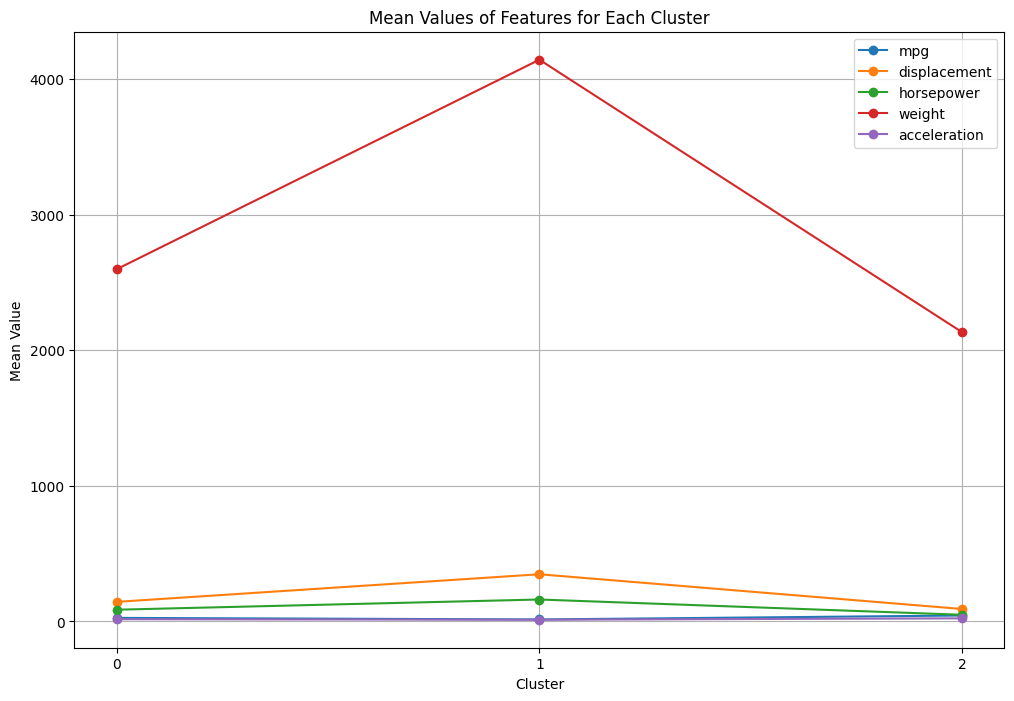

In [20]:
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
plt.figure(figsize=(12, 8)) 
for feature in features:
    plt.plot(cluster_means_2.index, cluster_means_2[feature], marker='o', label=feature)  # 绘制折线图

plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(cluster_means_2.index)  
plt.legend()  
plt.grid(True)  
plt.savefig('figures/cluster_means_line_2.png')
plt.show()

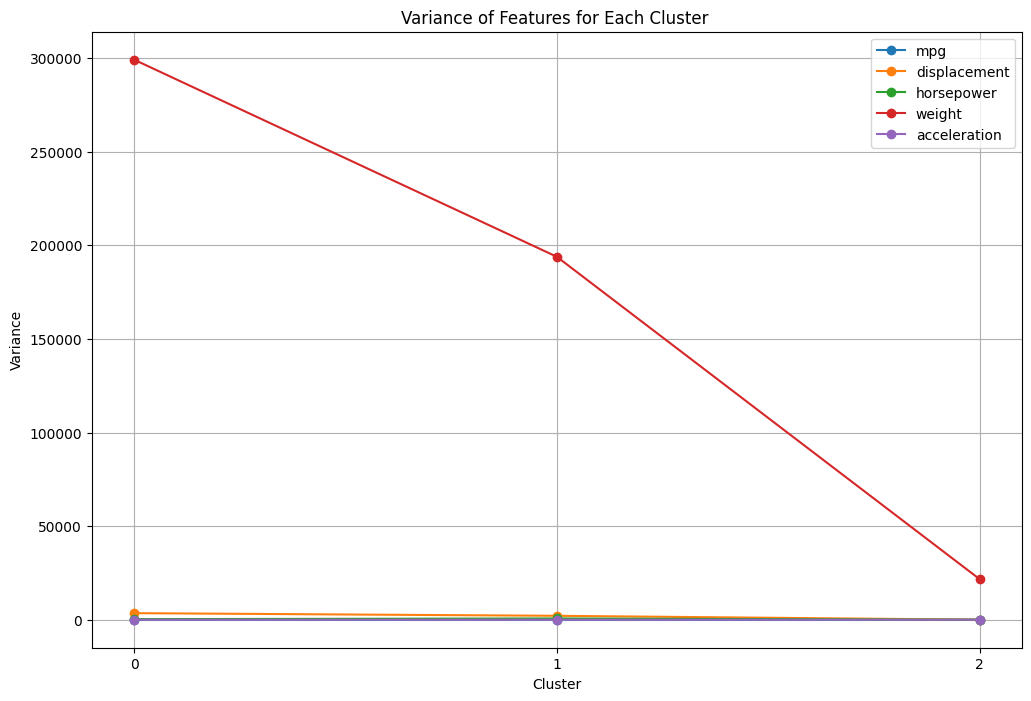

In [21]:
plt.figure(figsize=(12, 8))  
for feature in features:
    plt.plot(cluster_variances_2.index, cluster_variances_2[feature], marker='o', label=feature)  

plt.title('Variance of Features for Each Cluster ')
plt.xlabel('Cluster')
plt.ylabel('Variance')
plt.xticks(cluster_variances_2.index)  
plt.legend()  
plt.grid(True)  
plt.savefig('figures/cluster_variance_line_2.png')
plt.show()

In [22]:
selected_scaled['origin'] = auto_mpg_df['origin']  
origin_means = selected_scaled.groupby('origin').mean()
origin_variances = selected_scaled.groupby('origin').var()

print("\nThe Origin mean value after standardization:\n", origin_means)
print("\nThe Origin variance value after standardization:\n", origin_variances)


The Origin mean value after standardization:
              mpg  displacement  horsepower    weight  acceleration   cluster
origin                                                                      
1      -0.439530      0.503902    0.376014  0.462896     -0.194013  0.389558
2       0.560693     -0.809334   -0.608826 -0.646890      0.442612  0.114286
3       0.888537     -0.871117   -0.645693 -0.885809      0.219322  0.000000

The Origin variance value after standardization:
              mpg  displacement  horsepower    weight  acceleration   cluster
origin                                                                      
1       0.672787      0.894672    1.078337  0.883071      0.997742  0.238761
2       0.741945      0.047022    0.282141  0.335704      1.222848  0.218634
3       0.608649      0.049375    0.218153  0.143594      0.503811  0.000000


In [23]:
selected_data['origin'] = auto_mpg_df['origin']  # 将 origin 列添加到 X_scaled 中
origin_means_2 = selected_data.groupby('origin').mean()
origin_variances_2 = selected_data.groupby('origin').var()

print("\nThe Origin mean value before standardization:\n", origin_means_2)
print("\nThe Origin variance value before standardization:\n", origin_variances_2)


The Origin mean value before standardization:
               mpg  displacement  horsepower       weight  acceleration  \
origin                                                                   
1       20.083534    245.901606  118.814769  3361.931727     15.033735   
2       27.891429    109.142857   81.241983  2423.300000     16.787143   
3       30.450633    102.708861   79.835443  2221.227848     16.172152   

         cluster  
origin            
1       0.389558  
2       0.114286  
3       0.000000  

The Origin variance value before standardization:
               mpg  displacement   horsepower         weight  acceleration  \
origin                                                                      
1       40.997026   9702.612255  1569.532304  631695.128385      7.568615   
2       45.211230    509.950311   410.659789  240142.328986      9.276209   
3       37.088685    535.465433   317.523856  102718.485881      3.821779   

         cluster  
origin            
1       0.

In [24]:
# 3.  列联表，比较聚类分配和 origin
contingency_table = pd.crosstab(selected_scaled['cluster'], auto_mpg_df['origin'])
print("\nContingency table (Clustering vs. Origin):\n", contingency_table)


Contingency table (Clustering vs. Origin):
 origin     1   2   3
cluster             
0        152  66  79
1         97   0   0
2          0   4   0


In [25]:
# 3.  列联表，比较聚类分配和 origin
contingency_table = pd.crosstab(selected_data['cluster'], auto_mpg_df['origin'])
print("\nContingency table (Clustering vs. Origin):\n", contingency_table)


Contingency table (Clustering vs. Origin):
 origin     1   2   3
cluster             
0        152  66  79
1         97   0   0
2          0   4   0


<Figure size 1200x700 with 0 Axes>

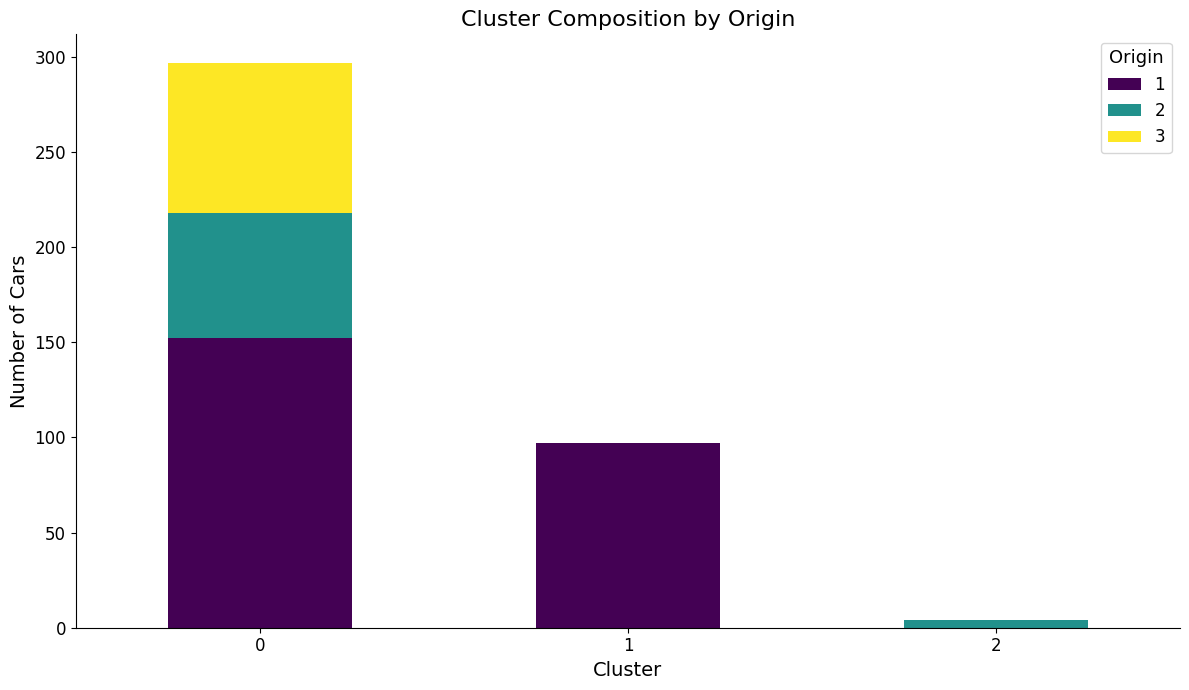

In [26]:
plt.figure(figsize=(12, 7))  
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')  

plt.title('Cluster Composition by Origin', fontsize=16)  
plt.xlabel('Cluster', fontsize=14)  
plt.ylabel('Number of Cars', fontsize=14)  
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 

plt.legend(title='Origin', fontsize=12, title_fontsize=13)  
plt.tight_layout()  
sns.despine() # 
plt.savefig('figures/cluster_Composition_by_origin.png')
plt.show()

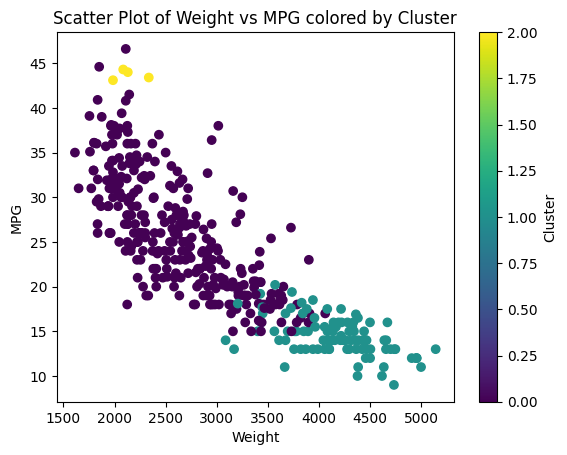

In [27]:
#散点图
plt.scatter(selected_data['weight'], selected_data['mpg'], c=selected_data['cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot of Weight vs MPG colored by Cluster')
plt.colorbar(label='Cluster')
plt.savefig('figures/Scatter_Plot1.png')
plt.show()

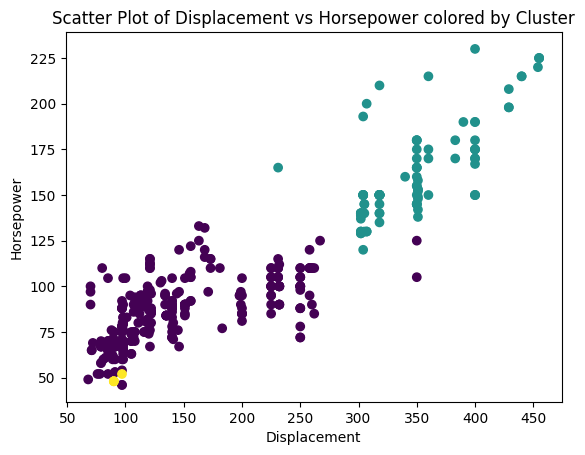

In [28]:
plt.scatter(selected_data['displacement'], selected_data['horsepower'], c=selected_data['cluster'], cmap='viridis')
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.title('Scatter Plot of Displacement vs Horsepower colored by Cluster')
plt.savefig('figures/Scatter_Plot2.png')
plt.show()

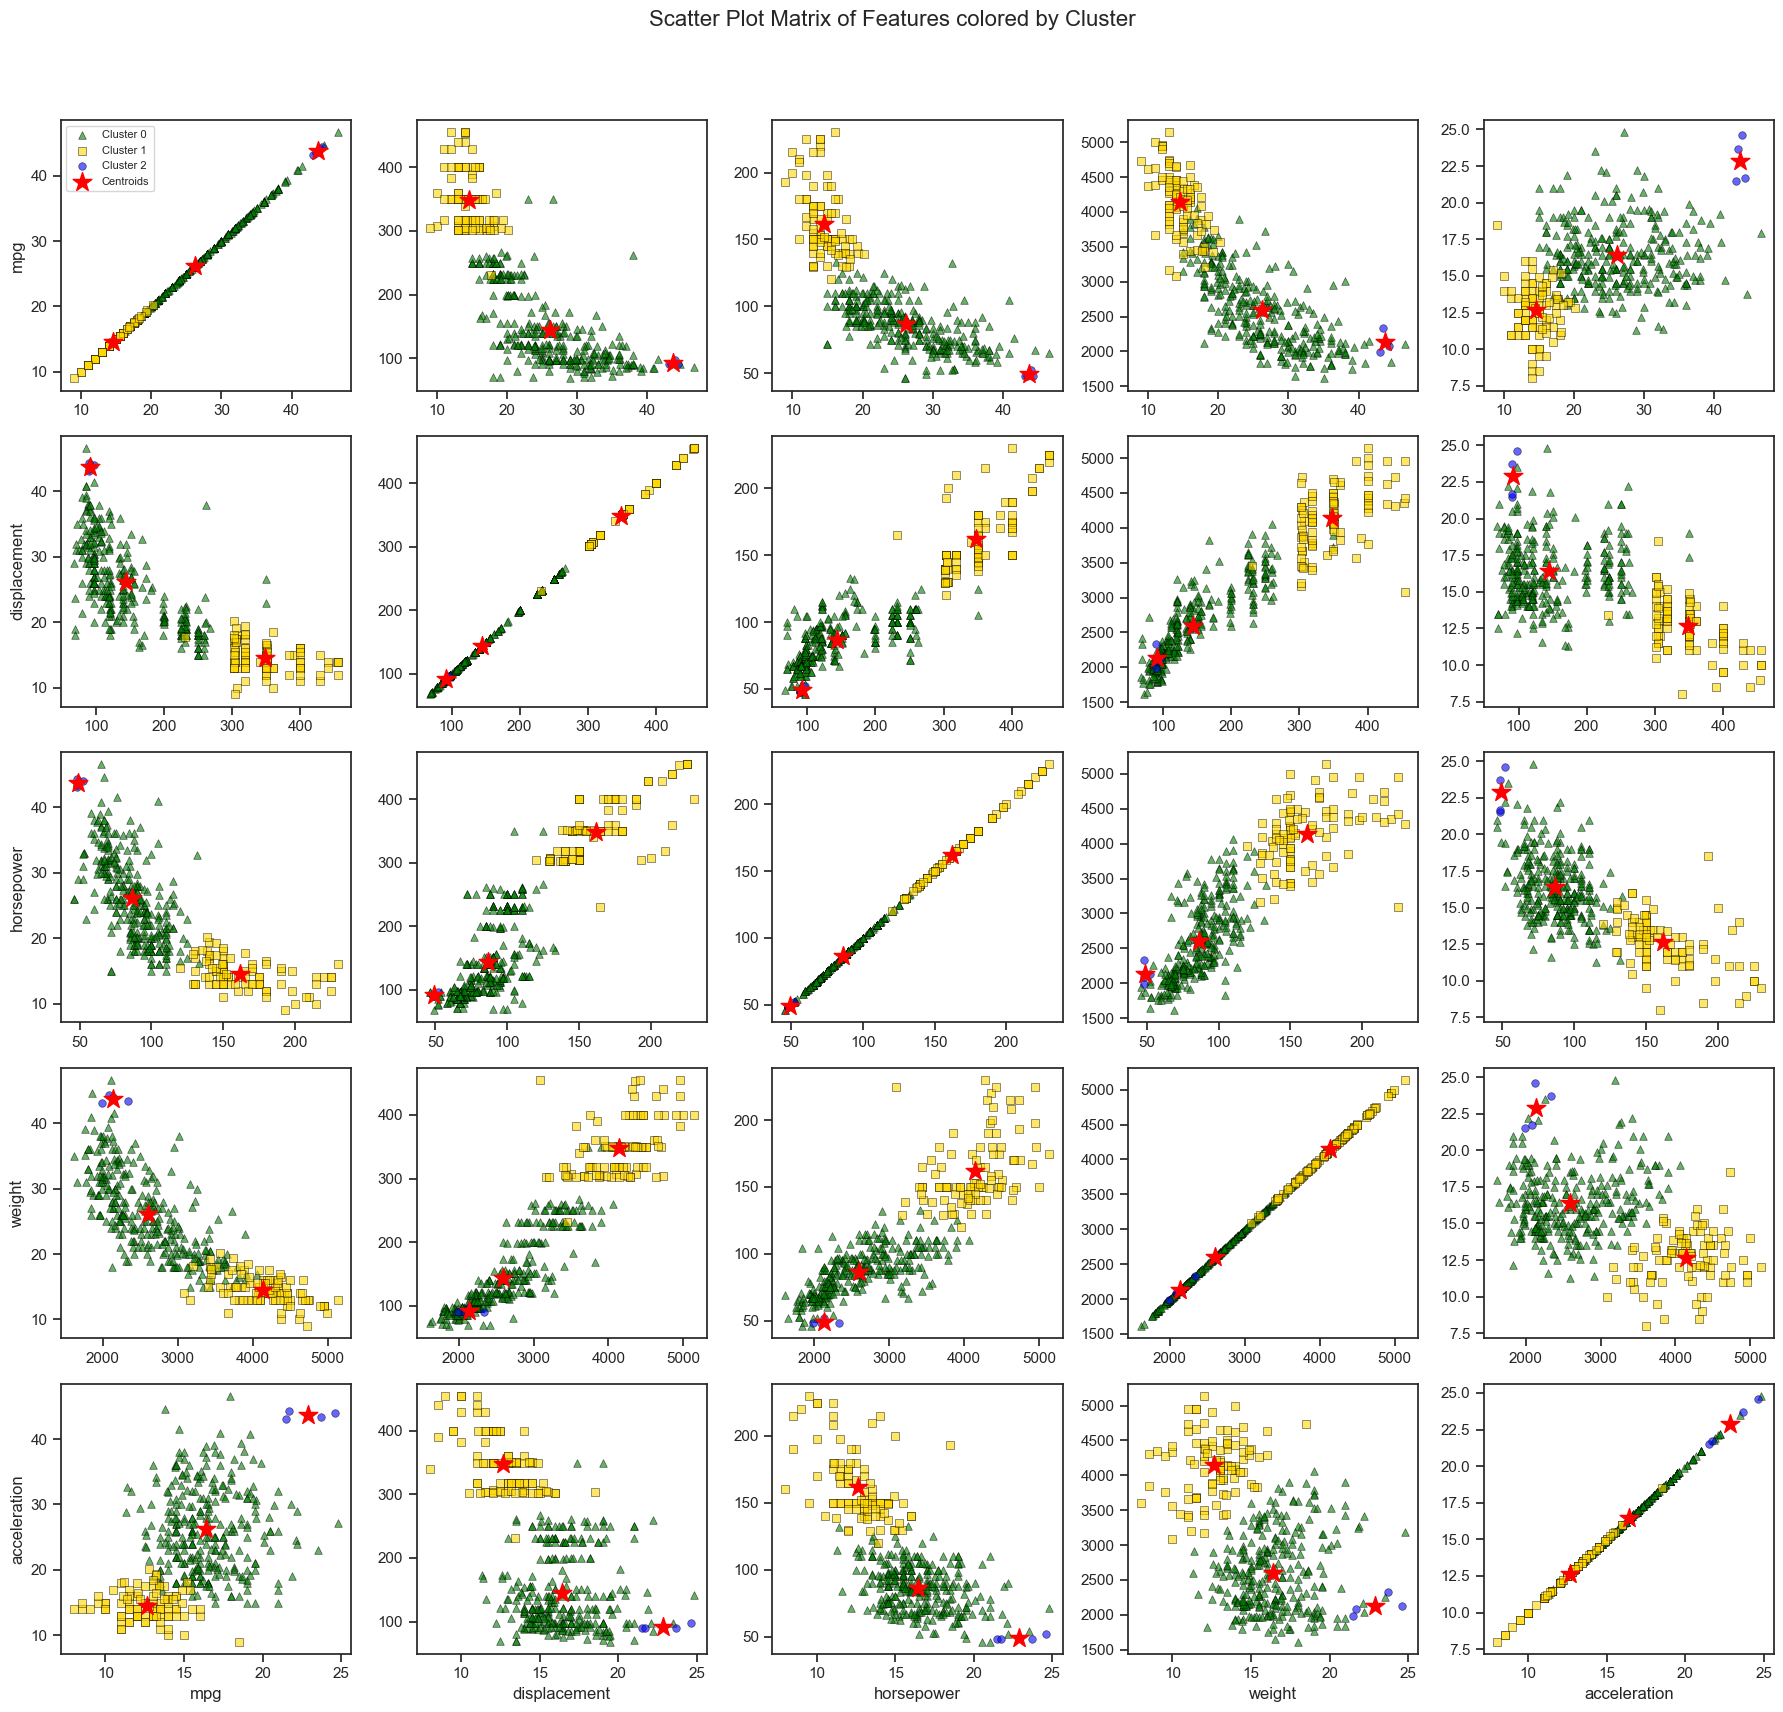

In [29]:
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# 计算每个簇的中心点 (均值)
cluster_centers = selected_data.groupby('cluster')[features].mean()
cluster_colors = ["green", "gold", "blue"]  
cluster_markers = ["^", "s", "o"]  # 三角形，正方形，圆形
# 散点图矩阵
sns.set(style="ticks")  
fig, axes = plt.subplots(len(features), len(features), figsize=(18, 18))  

for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]  

        for cluster_nr in range(n_clusters):
            ax.scatter(selected_data.loc[selected_data['cluster'] == cluster_nr, feature_x],
                       selected_data.loc[selected_data['cluster'] == cluster_nr, feature_y],
                       s=30, alpha=0.6,
                       color=cluster_colors[cluster_nr], 
                       marker=cluster_markers[cluster_nr],  
                       edgecolor='black', 
                       linewidths=0.5,  
                       label=f'Cluster {cluster_nr}')

        ax.scatter(cluster_centers[feature_x], cluster_centers[feature_y],
                   marker='*', s=200, color='red',
                   label='Centroids')

        if i == len(features) - 1:
            ax.set_xlabel(feature_y, fontsize=12)
        if j == 0:
            ax.set_ylabel(feature_x, fontsize=12)
        if i == 0 and j == 0:
             ax.legend(fontsize=8)  #


plt.suptitle('Scatter Plot Matrix of Features colored by Cluster', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.savefig('figures/scatter_plot_matrix.png')  
plt.show()